# Code for plots and main analyses in: Ma, Westhoff, van Duijvenvoorde (BioRxiv)
 The paper can be found here: https://doi.org/10.1101/2020.05.19.105114
 


In [10]:
#load packages and data files
library(lme4)
library(ggplot2)
library(reshape2)
options(repr.plot.width=10, repr.plot.height=8)
library(sjPlot)
library(RColorBrewer)
library(stargazer)
library("tidyr")
library(ppcor)
library(ggcorrplot)
library(lmerTest)
library(ggforce)
library(emmeans)

# setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/analyses")
sampledata <- read.csv('sampledata.csv')
sampledata$f_ageGroup <- as.factor(sampledata$ageGroup) # groups for data visualization
sampledata$open <- 25 - sampledata$closed
sampledata$f_recip <- as.factor(sampledata$recip)
sampleHist <- sampledata[!sampledata$rawChoice == 0,]

# setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/data/vragenlijsten/")
#BICdiff <- read.csv("../data/vragenlijsten/BIC_models_Forrestplot_ORA.csv", header = TRUE)
#Age_BICdiff <- read.csv("../data/vragenlijsten/Age_BICDifference.csv", header = TRUE)
#SumBIC <- read.csv("../data/vragenlijsten/Summed_BIC_ORA.csv", header = TRUE)
#Age_BICdiffUn <- read.csv("../data/vragenlijsten/Age_BICDifference_Uncert.csv", header = TRUE)
df_selfreports <- read.csv("../data/vragenlijsten/SL3_APQSEQ_IliJune2021.csv", header = TRUE)

bics = read.csv("modelcomparisons/Bics_Unc_Opt_Thr_Ksa.csv")
names(bics) <- c("subject", "Uncertainty", "Sample Cost", "Threshold", "Count")
bicsLong <- bics[c("Uncertainty", "Sample Cost", "Threshold", "Count")]
bicsLong <- melt(bicsLong, id.vars=NULL)
names(bicsLong) <- c("Model", "bic")

# setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/analyses/")
df_models <- read.csv('df_models.csv')

head(sampleHist)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../data/vragenlijsten/Summed_BIC_ORA.csv'”

,subject,gender,ageExact,age,trial,trialstart,trialtime,recip,rawChoice,green,red,closed,choice,diffgreen,ageGroup,f_ageGroup,open,f_recip
10,1,0,20.94,20,1,0.222462,90.88502,0.4,-1,4,5,16,-1,1,4,4,9,0.4
14,1,0,20.94,20,2,91.037060,96.41262,0.6,-1,0,3,22,-1,3,4,4,3,0.6
20,1,0,20.94,20,3,96.533799,105.41434,0.4,-1,1,4,20,-1,3,4,4,5,0.4
24,1,0,20.94,20,4,105.539476,111.67599,1.0,1,3,0,22,1,3,4,4,3,1
28,1,0,20.94,20,5,111.784499,115.01241,0.2,1,3,0,22,1,3,4,4,3,0.2
32,1,0,20.94,20,6,115.065458,118.12361,0.0,-1,0,3,22,-1,3,4,4,3,0


In [627]:
bicsage <- merge(x = bics, y = df_models[ , c("subject", "ageExact")], by = "subject", all.x=TRUE)

In [637]:
head(bics)

subject,Uncertainty,Sample Cost,Threshold,Count
1,287.09273,187.90751,159.10189,335.61683
2,316.70439,325.28080,337.42323,364.46436
3,299.66450,312.72249,301.78329,350.63199
4,283.45578,158.83017,347.09739,348.97938
5,29.40976,44.11465,22.05732,15.51621
6,293.23646,316.42260,308.02802,371.79804


In [640]:

bicsage$tre_count <- bicsage[, "Threshold"] - bicsage$Count
cor.test(bicsage$ageExact, bicsage$tre_count, method=c("spearman"))

Warning message in cor.test.default(bicsage$ageExact, bicsage$tre_count, method = c("spearman")):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  bicsage$ageExact and bicsage$tre_count
S = 579940, p-value = 0.209
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1008048 


In [15]:
# setwd("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/analyses/")
df_models <- read.csv('df_models.csv')
head(df_models)

subject,Subject,Age_Q1,sex_birth,ARQ_risico_1,ARQ_risico_2,ARQ_risico_3,ARQ_risico_4,ARQ_risico_5,ARQ_risico_6,⋯,s_ageExact,logmeanprior,logcriterion,logpriorSD,priorTrust,priorCertain,f_age,ageGroup,f_ageGroup,ageGroupsmall
1,SLP3-001,20,1,1,2,1,2,0,0,⋯,0.7932259,-0.6931472,-2.100869,-1.242453,3,5,20,4,4,6
100,SLP3-100,13,1,2,4,2,3,2,3,⋯,-1.0177947,-0.6473044,-2.255129,-1.722693,4,3,13,2,2,2
101,SLP3-101,11,1,0,2,1,0,1,0,⋯,-1.4509650,-0.6613053,-2.330882,-1.539272,5,2,11,1,1,1
102,SLP3-102,14,1,3,4,2,4,1,2,⋯,-0.6952210,-1.6962581,-3.735384,-2.457160,6,5,14,2,2,3
103,SLP3-103,12,1,2,4,3,4,1,2,⋯,-1.0846135,-0.8268352,-20.324490,-1.811195,4,5,12,1,1,2
104,SLP3-104,15,2,1,4,3,4,0,1,⋯,-0.4417703,-0.6664548,-2.516137,-1.770695,8,5,15,2,2,3


## 1.0 BEHAVIOR PLOTS
### Figure1b. Sample data

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”

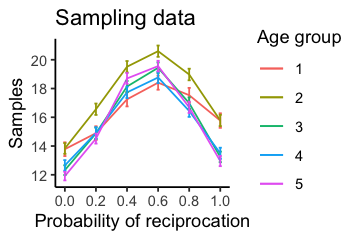

In [9]:
options(repr.plot.width=3, repr.plot.height=2)
p_1B <- ggplot(sampleHist, aes(x = recip, y = open, color = f_ageGroup)) + 
  stat_summary(fun.y=mean,
               geom="line") +
  stat_summary(fun.data=mean_se,
               geom="errorbar",
               width = 0.02) + 
  labs(title = "Sampling data", x = "Probability of reciprocation", y = "Samples", color = "Age group") +
  theme_classic() +
  scale_x_continuous(breaks=seq(0,1,0.2)) 
p_1B

## Figure1c. Invest data

In [5]:
p <- ggplot(sampleHist, aes(x = recip, y = rawChoice, color = f_ageGroup)) + 
  stat_summary(fun.y=mean, geom="line") +
  stat_summary(fun.data=mean_se, geom="errorbar", width = 0.02) + 
  scale_fill_brewer(palette = "Paired") +
  labs(title = "Trust data", x = "Probability of reciprocation", y = "proportion of investments", color = "Age group") +
  theme_classic() +
  scale_x_continuous(breaks=seq(0,1,0.2))
p

ERROR: Error in ggplot(sampleHist, aes(x = recip, y = rawChoice, color = f_ageGroup)): object 'sampleHist' not found


## 2.0 ILLUSTRATIONS OF THE PRIOR BELIEF UPDATES
## Figure2a: Hypothetical prior distributions 

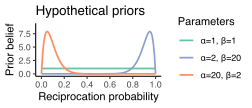

In [6]:
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

x <- seq(0, 1, .01)
q <- dbeta(x, 1, 1)
z <- dbeta(x, 2, 20)
w <- dbeta(x, 20, 2)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              labels=c("α=1, β=1", "α=2, β=20", "α=20, β=2"))
gg <- gg + labs(x="Reciprocation probability", y="Prior belief",
                title="Hypothetical priors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic() 
gg 

ggsave("prior.pdf", width = 3.5, height = 1.5)

## Figure2a: Hypothetical posterior distributions 

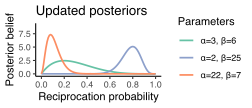

In [7]:
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

x <- seq(0, 1, .01)
q <- dbeta(x, 2, 5)
z <- dbeta(x, 3, 24)
w <- dbeta(x, 21, 6)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              labels=c("α=3, β=6", "α=2, β=25", "α=22, β=7"))
gg <- gg + labs(x="Reciprocation probability", y="Posterior belief",
                title="Updated posteriors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic() 
gg 
ggsave("posterior1.pdf", width = 3.5, height = 1.5)

## Figure2b: Corresponding posterior distributions to illustrate the effect of prior distributions on belief updates

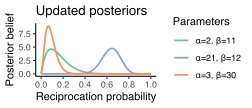

In [7]:
options(repr.plot.width=3.5, repr.plot.height=1.5)
options(warn=-1)
options(jupyter.plot_mimetypes = "image/svg+xml") 

# green+1, red+10
x <- seq(0, 1, .01)
q <- dbeta(x, 2, 11)
z <- dbeta(x, 3, 30)
w <- dbeta(x, 21, 12)
df <- data.frame(x, q, z, w)

df <- gather(df, func, val, -x)
gg <- ggplot(df, aes(x=x, y=val, group=func))
gg <- gg + geom_line(aes(color=func), size =0.8)
gg <- gg + scale_color_manual(name="Parameters", 
                              values=c("#66c2a5", "#8da0cb", "#fc8d62"),
                              labels=c("α=2, β=11", "α=21, β=12", "α=3, β=30"))
gg <- gg + labs(x="Reciprocation probability", y="Posterior belief",
                title="Updated posteriors") +
ylim(0,9) +
scale_x_continuous(breaks=seq(0,1,0.2)) 

gg <- gg + theme_classic()

gg

ggsave("posterior2.pdf", width = 3.5, height = 1.5)

## 3.0 DESCRIPTIVE STATISTICS
### Mixed-effects model on the number of samples 

In [8]:
sampleHist$outcomeUnc <- sampleHist$recip*(1- sampleHist$recip)
modeloutcomeUnc_lin <- lmer(open ~ scale(outcomeUnc) * scale(ageExact) + (1| subject), data = sampleHist)
modeloutcomeUnc_poly<- lmer(open ~ scale(outcomeUnc) * poly(scale(ageExact), degree = 2, raw = TRUE) + (1| subject), data = sampleHist)
anova(modeloutcomeUnc_lin, modeloutcomeUnc_poly)
summary(modeloutcomeUnc_lin)
tab_model(modeloutcomeUnc_lin)

ERROR: Error in eval(expr, envir, enclos): object 'sampleHist' not found


### Post hoc test on number of samples using emtrends

In [193]:
emtrends(modeloutcomeUnc_lin, pairwise ~ f_ageGroup, var="outcomeUnc", pbkrtest.limit = 9420 )

$emtrends
 f_ageGroup outcomeUnc.trend   SE   df lower.CL upper.CL
 1                      12.2 1.15 9258     9.93     14.4
 2                      21.4 1.13 9258    19.19     23.6
 3                      24.3 1.15 9258    22.01     26.5
 4                      20.8 1.13 9258    18.59     23.0
 5                      26.7 1.15 9258    24.50     29.0

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast estimate   SE   df t.ratio p.value
 1 - 2      -9.217 1.61 9258 -5.722  <.0001 
 1 - 3     -12.081 1.62 9258 -7.441  <.0001 
 1 - 4      -8.619 1.61 9258 -5.351  <.0001 
 1 - 5     -14.565 1.62 9258 -8.971  <.0001 
 2 - 3      -2.863 1.61 9258 -1.778  0.3867 
 2 - 4       0.598 1.60 9258  0.375  0.9958 
 2 - 5      -5.348 1.61 9258 -3.320  0.0080 
 3 - 4       3.462 1.61 9258  2.149  0.1995 
 3 - 5      -2.484 1.62 9258 -1.530  0.5428 
 4 - 5      -5.946 1.61 9258 -3.691  0.0021 

Degrees-of-freedom method: kenward-roger 
P value adjustment: tukey 

### Post hoc analyses per reciprocation probability

In [216]:
modelrecip <- lmer(open ~ f_recip * scale(ageExact) + (1| subject), data = sampleHist)
emtrends(modelrecip, pairwise ~ f_recip, var="ageExact", pbkrtest.limit = 9420 )

$emtrends
 f_recip ageExact.trend    SE  df lower.CL upper.CL
 0              -0.1724 0.102 177   -0.375   0.0296
 0.2            -0.0850 0.102 177   -0.287   0.1171
 0.4             0.0214 0.102 177   -0.181   0.2235
 0.6             0.0166 0.102 177   -0.186   0.2187
 0.8            -0.1515 0.102 177   -0.354   0.0506
 1              -0.2765 0.102 177   -0.479  -0.0744

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$contrasts
 contrast  estimate     SE   df t.ratio p.value
 0 - 0.2   -0.08746 0.0401 9253 -2.180  0.2471 
 0 - 0.4   -0.19388 0.0401 9253 -4.833  <.0001 
 0 - 0.6   -0.18902 0.0401 9253 -4.712  <.0001 
 0 - 0.8   -0.02091 0.0401 9253 -0.521  0.9954 
 0 - 1      0.10409 0.0401 9253  2.595  0.0986 
 0.2 - 0.4 -0.10642 0.0401 9253 -2.653  0.0851 
 0.2 - 0.6 -0.10156 0.0401 9253 -2.532  0.1150 
 0.2 - 0.8  0.06655 0.0401 9253  1.659  0.5592 
 0.2 - 1    0.19155 0.0401 9253  4.775  <.0001 
 0.4 - 0.6  0.00486 0.0401 9253  0.121  1.0000 
 0.4 - 0.8  0.

### Mixed effects models of investing

In [217]:
# center and scale for invest regression
sampleHist$rawChoice[sampleHist$rawChoice<0] <- 0
sampleHist$s_ageExact <- scale(sampleHist$ageExact, center = TRUE, scale = TRUE)

# Descriptive statistics: invest decisions were predicted by the reciprocation probability
modelinv_lin <- glmer(rawChoice ~ scale(recip) * s_ageExact + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
modelinv_quad <- glmer(rawChoice ~ scale(recip) * poly(s_ageExact, degree = 2, raw = TRUE) + (1| subject), data = sampleHist, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
anova(modelinv_lin, modelinv_quad)

tab_model(modelinv_lin)
summary(modelinv_lin)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
modelinv_lin,5,5574.199,5609.952,-2782.099,5564.199,NA,NA,NA
modelinv_quad,7,5560.027,5610.081,-2773.013,5546.027,18.172,2,0.0001132399


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rawChoice ~ scale(recip) * s_ageExact + (1 | subject)
   Data: sampleHist
Control: glmerControl(optCtrl = list(maxfun = 1e+09), optimizer = c("bobyqa"))

     AIC      BIC   logLik deviance df.resid 
  5574.2   5610.0  -2782.1   5564.2     9415 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-27.821  -0.254  -0.037   0.247  37.818 

Random effects:
 Groups  Name        Variance Std.Dev.
 subject (Intercept) 0.734    0.8567  
Number of obs: 9420, groups:  subject, 157

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -0.47808    0.07785  -6.141 8.18e-10 ***
scale(recip)             3.41369    0.07637  44.699  < 2e-16 ***
s_ageExact              -0.01092    0.07772  -0.141    0.888    
scale(recip):s_ageExact  0.86029    0.06832  12.592  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.

### Follow-up post-hoc tests per reciprocation proability for invest decisions

In [60]:
fun_posthoc_model <- function(df, recipselection) {
    df_recipdiffs <- subset(df, recip == recipselection)
    posthoc_model <- glmer(rawChoice ~ scale(ageExact) + (1| subject), data = df_recipdiffs, family = binomial, control = glmerControl(optCtrl = list(maxfun = 1e+9), optimizer = c("bobyqa")))
    summary(posthoc_model)
}

fun_posthoc_model(sampleHist, 0.0)
fun_posthoc_model(sampleHist, 0.2)
fun_posthoc_model(sampleHist, 0.4)
fun_posthoc_model(sampleHist, 0.6)
fun_posthoc_model(sampleHist, 0.8)
fun_posthoc_model(sampleHist, 1.0)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rawChoice ~ scale(ageExact) + (1 | subject)
   Data: df_recipdiffs

REML criterion at convergence: -1540.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9336 -0.1110 -0.0609 -0.0150  6.6720 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.003754 0.06127 
 Residual             0.019533 0.13976 
Number of obs: 1570, groups:  subject, 157

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.024204   0.006029 154.999995   4.014 9.26e-05 ***
scale(ageExact)  -0.020101   0.006031 154.999994  -3.333  0.00107 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(gExct) 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rawChoice ~ scale(ageExact) + (1 | subject)
   Data: df_recipdiffs

REML criterion at convergence: -687.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2680 -0.1233 -0.0862 -0.0501  5.0712 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.006376 0.07985 
 Residual             0.033687 0.18354 
Number of obs: 1570, groups:  subject, 157

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.042038   0.007878 154.999998   5.336 3.32e-07 ***
scale(ageExact)  -0.018224   0.007881 154.999998  -2.312   0.0221 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(gExct) 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rawChoice ~ scale(ageExact) + (1 | subject)
   Data: df_recipdiffs

REML criterion at convergence: 1419.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6600 -0.5341 -0.3669 -0.1967  2.4075 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.01875  0.1369  
 Residual             0.13135  0.3624  
Number of obs: 1570, groups:  subject, 157

Fixed effects:
                  Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)       0.183439   0.014250 154.999996  12.873   <2e-16 ***
scale(ageExact)  -0.009844   0.014255 154.999996  -0.691    0.491    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(gExct) 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rawChoice ~ scale(ageExact) + (1 | subject)
   Data: df_recipdiffs

REML criterion at convergence: 2048.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8942 -0.9186  0.4191  0.7402  1.7198 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.04434  0.2106  
 Residual             0.19016  0.4361  
Number of obs: 1570, groups:  subject, 157

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       0.62611    0.02009 154.99999  31.169   <2e-16 ***
scale(ageExact)   0.02007    0.02009 154.99999   0.999    0.319    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(gExct) 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rawChoice ~ scale(ageExact) + (1 | subject)
   Data: df_recipdiffs

REML criterion at convergence: 239

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7635  0.0700  0.1976  0.3419  1.7365 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.00734  0.08567 
 Residual             0.06256  0.25012 
Number of obs: 1570, groups:  subject, 157

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     9.223e-01  9.306e-03 1.550e+02  99.108  < 2e-16 ***
scale(ageExact) 4.406e-02  9.309e-03 1.550e+02   4.733 4.95e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(gExct) 0.000 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rawChoice ~ scale(ageExact) + (1 | subject)
   Data: df_recipdiffs

REML criterion at convergence: -529.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8537  0.0180  0.1052  0.2152  2.0675 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 0.00567  0.0753  
 Residual             0.03779  0.1944  
Number of obs: 1570, groups:  subject, 157

Fixed effects:
                 Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     9.529e-01  7.758e-03 1.550e+02 122.821  < 2e-16 ***
scale(ageExact) 3.964e-02  7.761e-03 1.550e+02   5.108 9.47e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(gExct) 0.000 

## 4.0 MODEL COMPARISONS
### Figure 3A. Model comparisons

In [593]:
#head(bics)
head(df_models)

subject,Subject,Age_Q1,sex_birth,ARQ_risico_1,ARQ_risico_2,ARQ_risico_3,ARQ_risico_4,ARQ_risico_5,ARQ_risico_6,⋯,logcriterion,logpriorSD,priorTrust,priorCertain,f_age,ageGroup,f_ageGroup,ageGroupsmall,s_age_lin,s_age_quad
1,SLP3-001,20,1,1,2,1,2,0,0,⋯,-2.100869,-1.242453,3,5,20,4,4,6,0.7932259,-0.42539216
100,SLP3-100,13,1,2,4,2,3,2,3,⋯,-2.255129,-1.722693,4,3,13,2,2,2,-1.0177947,0.05870639
101,SLP3-101,11,1,0,2,1,0,1,0,⋯,-2.330882,-1.539272,5,2,11,1,1,1,-1.4509650,1.28786101
102,SLP3-102,14,1,3,4,2,4,1,2,⋯,-3.735384,-2.457160,6,5,14,2,2,3,-0.6952210,-0.57741684
103,SLP3-103,12,1,2,4,3,4,1,2,⋯,-20.324490,-1.811195,4,5,12,1,1,2,-1.0846135,0.22027403
104,SLP3-104,15,2,1,4,3,4,0,1,⋯,-2.516137,-1.770695,8,5,15,2,2,3,-0.4417703,-0.91002131


Warning message:
“Ignoring unknown parameters: fun.y”No summary function supplied, defaulting to `mean_se()`
No summary function supplied, defaulting to `mean_se()`


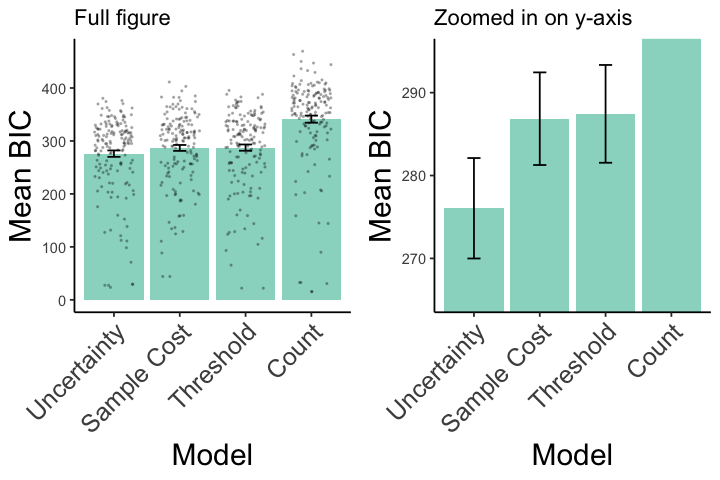

In [620]:
library(cowplot)
library(scales)
options(repr.plot.width=6, repr.plot.height=4)
# pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/MeanBIC.pdf", width = 5, height = 3)
with_dots <- geom_jitter(width=0.3, size=0.25, alpha=0.25)
bicplot <- ggplot(bicsLong, aes(Model, bic)) +
    geom_bar(stat="summary", fun.y="mean", fill = "#99d8c9") +
    stat_summary(fun.data=mean_se, geom="errorbar", width=0.2) +
    ylab('Mean BIC') +
    theme(
        axis.title = element_text(size = 18),
        axis.text.x=element_text( size = 15, angle = 45, hjust = 1),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position = "none"
    )
#     facet_zoom(ylim = c(260, 300))
plot_grid(bicplot + ggtitle("Full figure") + with_dots, bicplot + ggtitle("Zoomed in on y-axis") + scale_y_continuous(limits=c(265,295),oob = rescale_none), ncol = 2, nrow = 1)
# bicplot
# bicplot + scale_y_continuous(limits=c(260,300),oob = rescale_none)
 #dev.off()

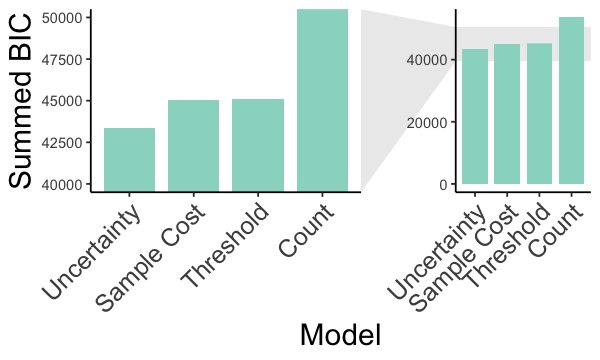

In [26]:
options(repr.plot.width=5, repr.plot.height=3)
# SumBIC$Model <- factor(SumBIC$Model,levels = c("Uncertainty", "Sample Cost", "Threshold", "Count"))
model_barplots <- ggplot(bicsLong, aes(x=Model, y=bic, width = 0.8)) +
  geom_bar(stat="identity", fill = "#99d8c9") +
  ylab('Summed BIC') +
  theme(axis.title = element_text(size = 18),
        axis.text.x=element_text( size = 15, angle = 45, hjust = 1),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
       legend.position = "none") +
facet_zoom(ylim = c(40000, 50000))
model_barplots
#dev.off()

In [106]:
head(bics)

Uncertainty,Sample Cost,Threshold,Count
287.09273,187.90751,159.10189,335.61683
316.70439,325.28080,337.42323,364.46436
299.66450,312.72249,301.78329,350.63199
283.45578,158.83017,347.09739,348.97938
29.40976,44.11465,22.05732,15.51621
293.23646,316.42260,308.02802,371.79804


## Figure 3B. model comparisons

In [613]:
bootdiff <- function(bics, col1, col2, n) {
    diffs = bics[,col1] - bics[,col2]
    samples = rep(NaN, n)
    for (i in 1:n) {
        samples[i] = sum(sample(diffs, replace = TRUE))
    }
    ci <- quantile(samples, probs = c(0.05, 0.95))
    return(list(
        Comparison = paste(names(bics)[col1], "-", names(bics)[col2]),
        SumDiff = sum(diffs),
        Lowerbound = as.numeric(ci[1]),
        Upperbound = as.numeric(ci[2])
    ))
}
nboot = 100000
booted_bic_diffs = data.frame(rbind(
    bootdiff(bics, 2, 3, nboot),
    bootdiff(bics, 2, 4, nboot),
    bootdiff(bics, 2, 5, nboot),
    bootdiff(bics, 3, 4, nboot),
    bootdiff(bics, 3, 5, nboot),
    bootdiff(bics, 4, 5, nboot)
))
booted_bic_diffs[,2:4] <- sapply(booted_bic_diffs[,2:4], as.numeric)
booted_bic_diffs$Comparison <- factor(as.character(booted_bic_diffs$Comparison), levels = rev(booted_bic_diffs$Comparison))

In [596]:
booted_bic_diffs

Comparison,SumDiff,Lowerbound,Upperbound
subject - Uncertainty,-30278.7077,-32044.0979,-28457.2787
subject - Sample Cost,-31975.4319,-33680.6679,-30244.9314
subject - Threshold,-32067.3144,-33867.0292,-30239.6048
Uncertainty - Sample Cost,-1696.7242,-2857.9388,-675.3425
Uncertainty - Threshold,-1788.6067,-2882.9752,-833.2296
Sample Cost - Threshold,-91.8825,-667.3905,445.8627


In [615]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/ModelComparisons.pdf", width = 7, height = 3)
options(repr.plot.width=7.5, repr.plot.height=2.5)
ggplot(booted_bic_diffs) +
    geom_bar( aes(x=Comparison, y=SumDiff), stat="identity", fill="#2ca25f", alpha=0.5) +
    geom_errorbar( aes(x=Comparison	, ymin=Lowerbound, ymax=Upperbound), width=0.4, colour="black", alpha=1, size=0.5) + 
    xlab('Pairwise model comparison')+ ylab("95% CI of summed BIC difference")+
    geom_hline(yintercept=1, linetype=2)+
    coord_flip() +
    theme(axis.title = element_text(size = 15),
        axis.text.y=element_text( size = 12),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
       legend.position = "none")
#dev.off()

pdf 
  2

### BIC difference correlation with age - not in paper because uncertainty model fits best even when there is a correlation

`geom_smooth()` using formula 'y ~ x'


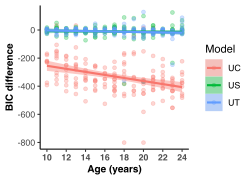

In [15]:
options(repr.plot.width=3.5, repr.plot.height=2.5)
P <- ggplot(Age_BICdiffUn, aes(x=Age, y=Difference, color=Model)) + 
  geom_point(alpha = 0.3)+
  xlab("Age (years)") +
  ylab("BIC difference") +
  geom_smooth(method=lm, aes(fill=Model)) +
  theme(plot.title=element_text(size=10,face="bold"),
        axis.text.x=element_text(face="bold"),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        axis.title=element_text(size=10,face="bold"))+
        scale_x_continuous(breaks=seq(10,24,2)) 
P

## 5.0 RELATION BETWEEN AGE AND MODEL DERIVED METRICS
### Regression uncertainty model prior mean estimates with age

In [30]:
lin_priormean_model <- lm(meanprior ~ s_ageExact, data = df_models)
quad_priormean_model <- lm(meanprior ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_priormean_model <- lm(meanprior ~ scale(log(ageExact)), data = df_models)

anova(lin_priormean_model, quad_priormean_model, log_priormean_model)

summary(lin_priormean_model) 
tab_model(lin_priormean_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,3.631000,NA,NA,NA,NA
154,3.595179,1,0.03582126,1.534409,0.2173367
155,3.620455,-1,-0.02527638,1.082717,0.2997213



Call:
lm(formula = meanprior ~ s_ageExact, data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41769 -0.08167  0.01150  0.05844  0.58679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.45048    0.01222  36.879   <2e-16 ***
s_ageExact   0.02263    0.01225   1.847   0.0667 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1531 on 155 degrees of freedom
Multiple R-squared:  0.02153,	Adjusted R-squared:  0.01521 
F-statistic:  3.41 on 1 and 155 DF,  p-value: 0.0667


### Regression uncertainty model prior uncertainty estimates with age

In [33]:
lin_priorSD_model <- lm(logpriorSD ~ s_ageExact, data = df_models)
quad_priorSD_model <- lm(logpriorSD ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_priorSD_model <- lm(logpriorSD ~ scale(log(ageExact)), data = df_models)

anova(lin_priorSD_model, quad_priorSD_model, log_priorSD_model)
summary(quad_priorSD_model) 
tab_model(quad_priorSD_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,524.0169,NA,NA,NA,NA
154,501.7480,1,22.26897,6.834947,0.009826869
155,516.8678,-1,-15.11987,4.640696,0.032777490



Call:
lm(formula = logpriorSD ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5710  -0.0047   0.4111   0.7009   2.1049 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                -1.8131     0.2186  -8.293 5.14e-14
poly(s_ageExact, degree = 2, raw = TRUE)1   0.4948     0.1445   3.423 0.000792
poly(s_ageExact, degree = 2, raw = TRUE)2  -0.4327     0.1655  -2.614 0.009827
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1 ***
poly(s_ageExact, degree = 2, raw = TRUE)2 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.805 on 154 degrees of freedom
Multiple R-squared:  0.1066,	Adjusted R-squared:  0.095 
F-statistic: 9.188 on 2 and 154 DF,  p-value: 0.00017


### Regression uncertainty model uncertainty tolerance criterion estimates with age

In [44]:
lin_criterion_model <- lm(logcriterion ~ s_ageExact, data = df_models)
quad_criterion_model <- lm(logcriterion ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_criterion_model <- lm(logcriterion ~ scale(log(ageExact)), data = df_models)


anova(lin_criterion_model, quad_criterion_model, log_criterion_model)
tab_model(lin_criterion_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,4091.782,NA,NA,NA,NA
154,4040.982,1,50.79923,1.9359357,0.1661172
155,4058.132,-1,-17.14914,0.6535457,0.4200949


### Regression uncertainty model prior uncertainty estimates with age

In [46]:
lin_softmax_model <- lm(log(softmax) ~ s_ageExact, data = df_models)
quad_softmax_model <- lm(log(softmax) ~ poly(s_ageExact, degree = 2, raw = TRUE), data = df_models)
log_softmax_model <- lm(log(softmax) ~ scale(log(ageExact)), data = df_models)

anova(lin_softmax_model, quad_softmax_model, log_softmax_model) 

tab_model(quad_softmax_model)
summary(quad_softmax_model)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
155,1108.642,NA,NA,NA,NA
154,1091.246,1,17.39511,2.454851,0.1192148
155,1106.796,-1,-15.54988,2.194447,0.1405521



Call:
lm(formula = log(softmax) ~ poly(s_ageExact, degree = 2, raw = TRUE), 
    data = df_models)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8185 -1.2977 -0.7736  0.0052 10.7265 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                                 4.8159     0.3224  14.936   <2e-16
poly(s_ageExact, degree = 2, raw = TRUE)1  -0.1160     0.2131  -0.544    0.587
poly(s_ageExact, degree = 2, raw = TRUE)2   0.3824     0.2441   1.567    0.119
                                             
(Intercept)                               ***
poly(s_ageExact, degree = 2, raw = TRUE)1    
poly(s_ageExact, degree = 2, raw = TRUE)2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.662 on 154 degrees of freedom
Multiple R-squared:  0.01744,	Adjusted R-squared:  0.004683 
F-statistic: 1.367 on 2 and 154 DF,  p-value: 0.2579


## 6.0 PLOTS RELATION BETWEEN AGE AND MODEL DERIVED METRICS
### Figure 4a: Pior mean as function of age

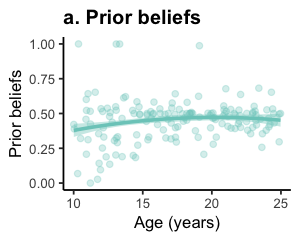

In [586]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/PriorBeliefs_robust.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
priormean_age <- ggplot(df_models, aes(x= ageExact, y= meanprior)) +
  geom_smooth(method=rlm, formula=y~I(x)+I(x^2), se=TRUE, color="#7bccc4", fill="#7bccc4") +
  geom_point(alpha = 0.3, color="#7bccc4", fill="#7bccc4") +
  ggtitle("a. Prior beliefs") +
  xlab("Age (years)") +
  ylab("Prior beliefs") +
  ylim(0,1) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
priormean_age
#dev.off()

### Figure 4b: Pior uncertainty as function of age

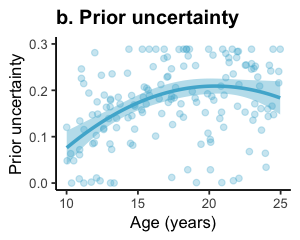

In [587]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/PriorUncertainty_robust.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
priorUnc_age <- ggplot(df_models, aes(x=ageExact, y= priorSD)) + 
  geom_smooth(method=rlm, formula=y~I(x)+I(x^2), se=TRUE, color="#4eb3d3", fill="#4eb3d3") +
  geom_point(alpha = 0.3, color="#4eb3d3", fill="#4eb3d3") +
  ggtitle("b. Prior uncertainty") +
  xlab("Age (years)") +
  ylab('Prior uncertainty') +
  ylim(0,0.3) +
  #scale_y_continuous(expand = c(0, 0), limits = c(0, NA)) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
priorUnc_age
#dev.off()

Figure 4c: uncertainty tolerance criterion as function of age

### Figure 4c: uncertainty tolerance criterion as function of age

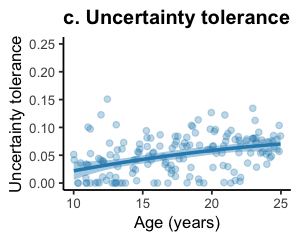

In [588]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/UncertaintyTol_robust.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
criterion_age <- ggplot(df_models, aes(x=ageExact, y= criterion)) +
  geom_smooth(method=rlm, formula=y~I(x)+I(x^2), se=TRUE, color="#2b8cbe", fill="#2b8cbe") +
  geom_point(alpha = 0.3, color="#2b8cbe", fill="#2b8cbe") +
  ggtitle("c. Uncertainty tolerance") +
  xlab("Age (years)") +
  ylab("Uncertainty tolerance") +  
  ylim(0, 0.25) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
criterion_age
#dev.off()

Warning message:
“Removed 16 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 16 rows containing missing values (geom_point).”

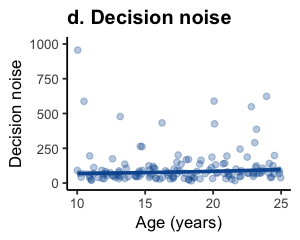

In [589]:
#pdf("~/Google Drive/Projects/Anna v Duijvenvoorde/Social belief updates/Manuscript/Scientific reports/figures/DecisionNoise_robust.pdf", width = 2.5, height = 2)
options(repr.plot.width=2.5, repr.plot.height=2)
noise_age <- ggplot(df_models, aes(x=ageExact, y= softmax)) +
  geom_smooth(method=rlm,formula=y~I(x)+I(x^2), se=TRUE, color="#08589e", fill="#08589e") +
  geom_point(alpha = 0.3, color="#08589e", fill="#08589e") +
  ggtitle("d. Decision noise") +
  xlab("Age (years)") +
  ylab("Decision noise") +  
  ylim(0, 1000) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
noise_age
#dev.off()

## 7.0 CORRLEATIONS BETWEEN MODEL DERIVED METRICS AND QUESTIONNAIRES

In [303]:
df_selfreports$Subject <- df_selfreports$SUBJECT

reqdf <- as.vector(c("meanprior","priorSD","criterion", "Subject", "ageExact")) # Storing the columns I want to extract as a vector
result <- df_models[,reqdf]       # Extracting only four columns

total <- merge(df_selfreports,result,by="Subject")
total$ID<-gsub("SLP3-","",as.character(total$Subject))
total<- na.omit(total)
total = subset(total, select = -c(Subject,SUBJECT, ID) )

head(total)

APQ_ChildPosParenting,APW_ChildPoorMonitoring,APQ_ChildInconsistentDisc,APQ_Child_InvolvMother,APQ_ChildInvolvFather,SEQ_ProsocialBeh,SEQ_AcceptingProsocialBeh,SEQ_PhysicalAgress,SEQ_RelationalAgress,SEQ_PhysicalVitimization,SEQ_RelationalVictimization,meanprior,priorSD,criterion,ageExact
17,28,6,22,23,4.14,3.43,1.33,1.6,1.33,1.2,0.5000000,0.2886751,0.1223500,20.94
19,30,15,25,12,3.43,3.43,1.33,1.6,1.00,1.2,0.3756470,0.1976461,0.0901150,18.81
19,25,16,34,31,3.86,3.71,2.00,2.4,1.67,2.4,0.5080777,0.2740696,0.1036800,18.52
21,29,18,34,37,2.86,3.71,1.50,1.0,1.33,1.2,0.5517919,0.1354863,0.0801770,23.06
25,14,10,44,14,3.86,2.71,1.00,1.4,1.00,1.0,0.4893254,0.0050209,0.0046124,21.69
14,22,18,34,30,3.86,3.00,1.00,1.2,1.17,1.0,0.4565487,0.2758767,0.0961730,20.26


### Correlation matrix plot 
#### Correlation between APW_child poor monitoring seems to correlate with prior uncertainty and uncertainty tolerance

,APQ_ChildPosParenting,APW_ChildPoorMonitoring,APQ_ChildInconsistentDisc,APQ_Child_InvolvMother,APQ_ChildInvolvFather,SEQ_ProsocialBeh,SEQ_AcceptingProsocialBeh,SEQ_PhysicalAgress,SEQ_RelationalAgress,SEQ_PhysicalVitimization,SEQ_RelationalVictimization,meanprior,priorSD,criterion
APQ_ChildPosParenting,1.0,-0.2,0.0,0.5,0.5,0.3,0.4,-0.1,-0.1,-0.1,-0.1,-0.2,-0.1,-0.1
APW_ChildPoorMonitoring,-0.2,1.0,0.3,-0.4,-0.3,-0.2,0.0,0.3,0.1,0.0,-0.1,0.1,0.3,0.2
APQ_ChildInconsistentDisc,0.0,0.3,1.0,-0.1,0.0,-0.2,0.0,0.3,0.2,0.2,0.2,-0.1,0.0,0.0
APQ_Child_InvolvMother,0.5,-0.4,-0.1,1.0,0.6,0.4,0.3,-0.1,-0.1,0.0,-0.1,-0.1,-0.1,-0.1
APQ_ChildInvolvFather,0.5,-0.3,0.0,0.6,1.0,0.3,0.3,-0.1,-0.1,0.0,-0.1,-0.1,0.0,-0.1
SEQ_ProsocialBeh,0.3,-0.2,-0.2,0.4,0.3,1.0,0.5,-0.3,-0.2,-0.2,-0.1,0.0,0.0,0.0
SEQ_AcceptingProsocialBeh,0.4,0.0,0.0,0.3,0.3,0.5,1.0,-0.1,-0.2,-0.1,-0.2,0.0,0.1,0.1
SEQ_PhysicalAgress,-0.1,0.3,0.3,-0.1,-0.1,-0.3,-0.1,1.0,0.5,0.6,0.3,0.0,0.0,-0.2
SEQ_RelationalAgress,-0.1,0.1,0.2,-0.1,-0.1,-0.2,-0.2,0.5,1.0,0.5,0.6,0.0,-0.2,-0.2
SEQ_PhysicalVitimization,-0.1,0.0,0.2,0.0,0.0,-0.2,-0.1,0.6,0.5,1.0,0.6,0.1,-0.1,-0.3


,APQ_ChildPosParenting,APW_ChildPoorMonitoring,APQ_ChildInconsistentDisc,APQ_Child_InvolvMother,APQ_ChildInvolvFather,SEQ_ProsocialBeh,SEQ_AcceptingProsocialBeh,SEQ_PhysicalAgress,SEQ_RelationalAgress,SEQ_PhysicalVitimization,SEQ_RelationalVictimization,meanprior,priorSD,criterion
APQ_ChildPosParenting,0.0000000000,0.0138642671,0.24515274,2.155216e-04,2.092981e-04,0.0115458540,0.0080351785,0.0648053200,1.062033e-01,1.474661e-01,2.115490e-01,0.07168235,0.35362836,0.487835469
APW_ChildPoorMonitoring,0.0138642671,0.0000000000,0.09570877,3.450137e-04,2.321617e-03,0.0271730275,0.2061729920,0.1619925412,6.363240e-01,9.410515e-01,7.881855e-01,0.49107771,0.09646412,0.226665156
APQ_ChildInconsistentDisc,0.2451527416,0.0957087675,0.00000000,9.352916e-02,1.872519e-01,0.0196115550,0.1324282207,0.0414600497,1.288525e-01,1.798323e-01,1.955628e-01,0.41934734,0.63503271,0.554606323
APQ_Child_InvolvMother,0.0002155216,0.0003450137,0.09352916,0.000000e+00,1.085093e-05,0.0044082394,0.0266262039,0.0614384306,1.291479e-01,2.712496e-01,2.881408e-01,0.19433095,0.30128473,0.410514514
APQ_ChildInvolvFather,0.0002092981,0.0023216166,0.18725194,1.085093e-05,0.000000e+00,0.0142426527,0.0298783964,0.0637471538,1.069801e-01,2.400810e-01,2.331990e-01,0.16374215,0.46466913,0.449331323
SEQ_ProsocialBeh,0.0115458540,0.0271730275,0.01961155,4.408239e-03,1.424265e-02,0.0000000000,0.0005659419,0.0016381884,1.519044e-02,2.402176e-02,8.565873e-02,0.55384941,0.83735163,0.909887882
SEQ_AcceptingProsocialBeh,0.0080351785,0.2061729920,0.13242822,2.662620e-02,2.987840e-02,0.0005659419,0.0000000000,0.0125671664,5.322999e-03,1.828576e-02,1.807858e-02,0.45247104,0.77526042,0.611135808
SEQ_PhysicalAgress,0.0648053200,0.1619925412,0.04146005,6.143843e-02,6.374715e-02,0.0016381884,0.0125671664,0.0000000000,5.094675e-04,1.650945e-04,1.048886e-02,0.89010697,0.37180076,0.085749406
SEQ_RelationalAgress,0.1062032602,0.6363239950,0.12885252,1.291479e-01,1.069801e-01,0.0151904372,0.0053229990,0.0005094675,0.000000e+00,1.345980e-04,2.115932e-05,0.85453096,0.05753172,0.035061867
SEQ_PhysicalVitimization,0.1474660956,0.9410515300,0.17983232,2.712496e-01,2.400810e-01,0.0240217563,0.0182857554,0.0001650945,1.345980e-04,0.000000e+00,3.942867e-05,0.96382251,0.07811947,0.008738859


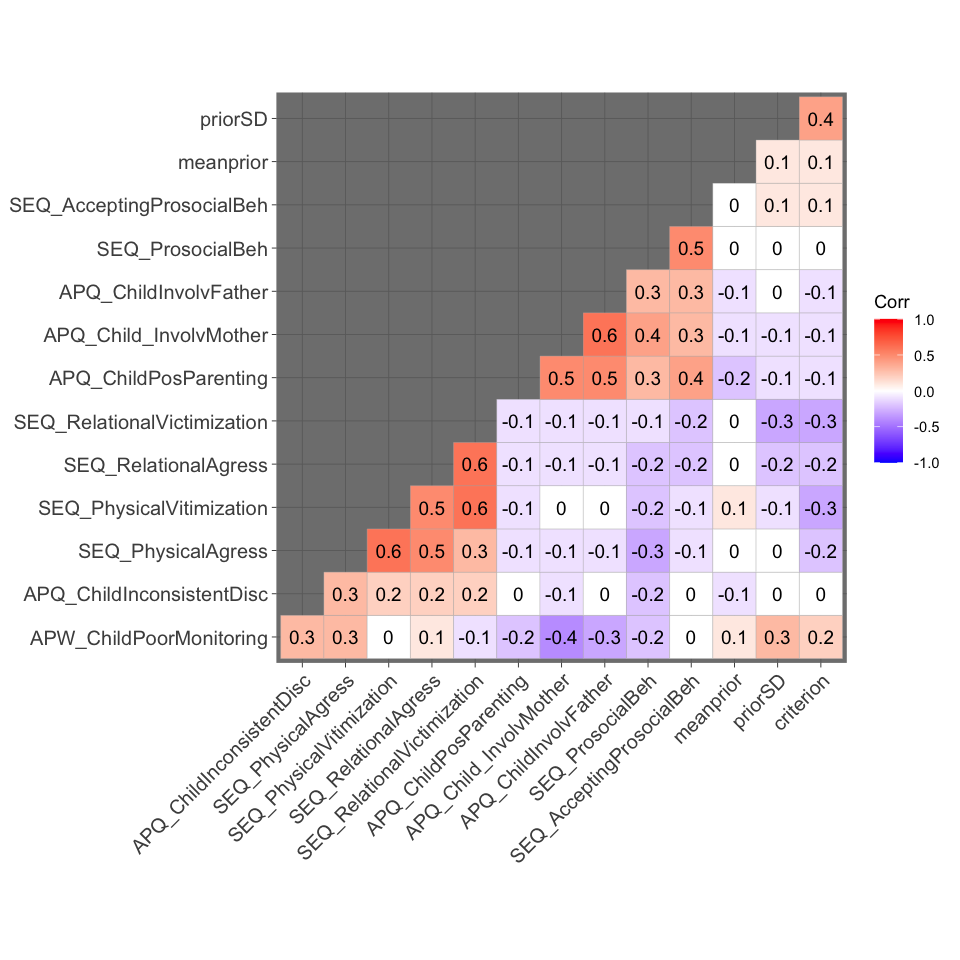

In [91]:
library(ggcorrplot)
options(repr.plot.width=8, repr.plot.height=8)
corr <- round(cor(total), 1)
corr
p.mat <- cor_pmat(corr)
p.mat

ggcorrplot(corr,
  hc.order = TRUE, type = "lower",
  lab = TRUE,
  ggtheme = ggplot2::theme_dark(),
)

In [329]:
pcor.test(total$SEQ_RelationalVictimization,total$meanprior,total[,c("ageExact")], method = "spearman")
pcor.test(total$SEQ_RelationalVictimization,total$priorSD,total[,c("ageExact")], method = "spearman")
pcor.test(total$SEQ_RelationalVictimization,total$criterion,total[,c("ageExact")], method = "spearman")

estimate,p.value,statistic,n,gp,Method
-0.07269969,0.3686699,-0.9016313,156,1,spearman


estimate,p.value,statistic,n,gp,Method
-0.1454188,0.07101143,-1.818057,156,1,spearman


estimate,p.value,statistic,n,gp,Method
-0.1621851,0.04377774,-2.033036,156,1,spearman


### Some quick plots to explore the relation further

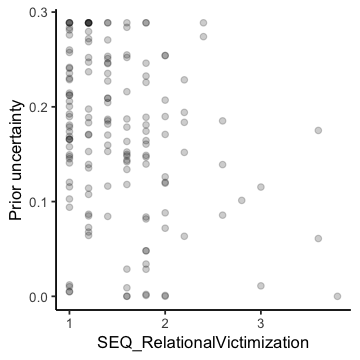

In [319]:
options(repr.plot.width=3, repr.plot.height=3)
  Uncert_monitoring <- ggplot(total, aes(x=SEQ_RelationalVictimization, y=priorSD)) + 
  geom_point(color = "black", alpha = 0.2)+
 # geom_smooth(color="darkgrey", fill="grey") +
  xlab("SEQ_RelationalVictimization") +
  ylab("Prior uncertainty") +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
Uncert_monitoring


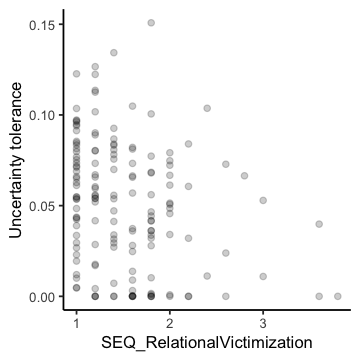

In [318]:
options(repr.plot.width=3, repr.plot.height=3)
Tol_monitoring <- ggplot(total, aes(x=SEQ_RelationalVictimization, y=criterion)) + 
  geom_point(color = "black", alpha = 0.2)+
  #geom_smooth(color="darkgrey", fill="grey") +
  xlab("SEQ_RelationalVictimization") +
  ylab("Uncertainty tolerance") +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold")) 
Tol_monitoring

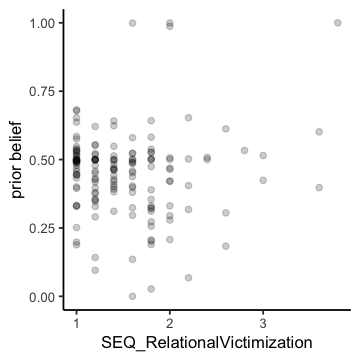

In [330]:
options(repr.plot.width=3, repr.plot.height=3)
Tol_mointoring <- ggplot(total, aes(x=SEQ_RelationalVictimization, y=meanprior)) + 
  geom_point(color = "black", alpha = 0.2)+
  #geom_smooth(color="darkgrey", fill="grey") +
  xlab("SEQ_RelationalVictimization") +
  ylab("prior belief") +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold")) 
Tol_mointoring

## Reviewer requests

In [10]:
# are number of samples normally distributed?

head(sampleHist)

,subject,gender,ageExact,age,trial,trialstart,trialtime,recip,rawChoice,green,red,closed,choice,diffgreen,ageGroup,f_ageGroup,open,f_recip
10,1,0,20.94,20,1,0.222462,90.88502,0.4,-1,4,5,16,-1,1,4,4,9,0.4
14,1,0,20.94,20,2,91.037060,96.41262,0.6,-1,0,3,22,-1,3,4,4,3,0.6
20,1,0,20.94,20,3,96.533799,105.41434,0.4,-1,1,4,20,-1,3,4,4,5,0.4
24,1,0,20.94,20,4,105.539476,111.67599,1.0,1,3,0,22,1,3,4,4,3,1
28,1,0,20.94,20,5,111.784499,115.01241,0.2,1,3,0,22,1,3,4,4,3,0.2
32,1,0,20.94,20,6,115.065458,118.12361,0.0,-1,0,3,22,-1,3,4,4,3,0


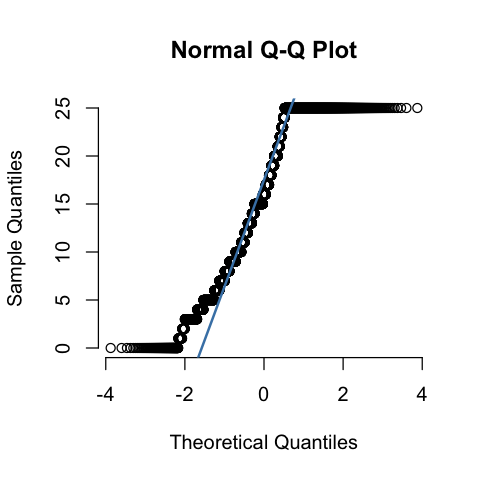

In [13]:
options(repr.plot.width=4, repr.plot.height=4)
qqnorm(sampleHist$open, pch = 1, frame = FALSE)
qqline(sampleHist$open, col = "steelblue", lwd = 2)

In [15]:
sampleHist$outcomeUnc <- sampleHist$recip*(1- sampleHist$recip)
modeloutcomeUnc_lin <- rlmer(open ~ scale(outcomeUnc) * scale(ageExact) + (1| subject), data = sampleHist)

In [16]:
summary(modeloutcomeUnc_lin)
tab_model(modeloutcomeUnc_lin)

Robust linear mixed model fit by DAStau 
Formula: open ~ scale(outcomeUnc) * scale(ageExact) + (1 | subject) 
   Data: sampleHist 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9056 -0.6200 -0.0150  0.6549  5.8479 

Random effects:
 Groups   Name        Variance Std.Dev.
 subject  (Intercept) 33.69    5.805   
 Residual             19.88    4.459   
Number of obs: 9420, groups: subject, 157

Fixed effects:
                                  Estimate Std. Error t value
(Intercept)                       16.64071    0.47747   34.85
scale(outcomeUnc)                  2.13752    0.04712   45.36
scale(ageExact)                   -0.90123    0.47750   -1.89
scale(outcomeUnc):scale(ageExact)  0.35506    0.04712    7.53

Correlation of Fixed Effects:
            (Intr) scl(U) scl(E)
scl(tcmUnc) 0.000               
scal(gExct) 0.000  0.000        
scl(tU):(E) 0.000  0.000  0.000 

Robustness weights for the residuals: 
 7509 weights are ~= 1. The remaining 1911 ones are summari

ERROR: Error in tab_model(modeloutcomeUnc_lin): could not find function "tab_model"


In [ ]:
sampleHist$outcomeUnc <- sampleHist$recip*(1- sampleHist$recip)
modeloutcomeUnc_lin <- lmer(open ~ scale(outcomeUnc) * scale(ageExact) + (1| subject), data = sampleHist)
modeloutcomeUnc_poly<- lmer(open ~ scale(outcomeUnc) * poly(scale(ageExact), degree = 2, raw = TRUE) + (1| subject), data = sampleHist)
anova(modeloutcomeUnc_lin, modeloutcomeUnc_poly)
summary(modeloutcomeUnc_lin)
tab_model(modeloutcomeUnc_lin)

In [ ]:
library(emmeans)
emmeans(modeloutcomeUnc_lin, list(pairwise ~ f_ageGroup), adjust = "tukey")

In [24]:
cor.test(x=df_models$meanprior, y=df_models$priorSD, method = 'spearman')

Warning message in cor.test.default(x = df_models$meanprior, y = df_models$priorSD, :
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  df_models$meanprior and df_models$priorSD
S = 497280, p-value = 0.003921
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2289679 


`geom_smooth()` using formula 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (geom_smooth).”

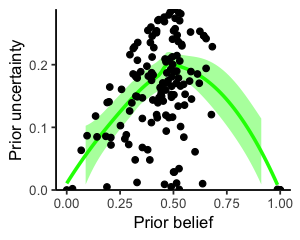

In [33]:
options(repr.plot.width=2.5, repr.plot.height=2)
prior_unc <- ggplot(df_models, aes(x=meanprior, y= priorSD)) + 
  geom_smooth(method=loess, se=TRUE, color="green", fill=" green") +
  geom_point() +
  xlab("Prior belief") +
  ylab('Prior uncertainty') +
  scale_y_continuous(expand = c(0, 0), limits = c(0, NA)) +
  theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
prior_unc
#dev.off()

## Parameter recovery

In [424]:
estdir = "modelcomparisons_code/"
recdir = "Recoveries/"

recover_plot <- function(est_df, rec_df, colnr, max_val=-1, min_val = 1) {
    data <- data.frame(Estimated=est_df[,colnr], Recovered=rec_df[,colnr])
    if (max_val < 0) {
        max_val = max(data)
    }
    if (min_val > 0) {
        min_val = min(0, min(data))
    }
    return(ggplot(data, aes(Estimated, Recovered)) +
        geom_segment(aes(x=min_val, y=min_val, xend=max_val, yend=max_val), size=0.01, linetype="dashed") +
        geom_point(alpha = 0.1) + xlim(c(min_val, max_val)) + ylim(c(min_val, max_val)) +
        xlab(paste("Simulated", names(rec_df)[colnr])) +
        ylab(paste("Recovered", names(rec_df)[colnr])) +
        theme(text = element_text(size = 10), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
        panel.background = element_blank(), axis.line = element_line(colour = "black"), plot.title = element_text(face="bold"))
    )
}

### Uncertainty Model

In [425]:
unc_est <- read.csv(paste0(estdir, "estimates_uncertaintyFull3_ORA_20March2019.csv"), header=FALSE)
unc_rec <- read.csv(paste0(recdir, "estimates_generatedUncertainty_recoveredUncertainty_all.csv"), header=FALSE)
unc_est$V1 <- NULL
names(unc_rec) = c("decision noise", "uncertainty tol.", "Prior Alpha", "Prior Beta")
names(unc_est) = names(unc_rec)

Warning message:
“Removed 29 rows containing missing values (geom_point).”

pdf 
  2

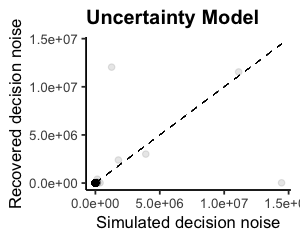

In [426]:
options(repr.plot.width=2.5, repr.plot.height=2)
recover_plot(unc_est, unc_rec, 1) + ggtitle("Uncertainty Model") 
pdf("Unc_recov_noise.pdf", width = 2.5, height = 2)
recover_plot(unc_est, unc_rec, 1, 500) 
dev.off()

In [427]:
pdf("Unc_recov_tolerance.pdf", width = 2.5, height = 2)
recover_plot(unc_est, unc_rec, 2)
dev.off()

pdf 
  2

In [428]:
pdf("Unc_recov_priorMean.pdf", width = 2.5, height = 2)
unc_est[,"prior belief"] = unc_est[,"Prior Alpha"] / (unc_est[,"Prior Alpha"] + unc_est[,"Prior Beta"])
unc_rec[,"prior belief"] = unc_rec[,"Prior Alpha"] / (unc_rec[,"Prior Alpha"] + unc_rec[,"Prior Beta"])
recover_plot(unc_est, unc_rec, 5)
dev.off()

pdf 
  2

In [429]:
pdf("Unc_recov_priorunc.pdf", width = 2.5, height = 2)
unc_est[,"prior uncertain"] = (unc_est[,"Prior Alpha"] * unc_est[,"Prior Beta"]) / (((unc_est[,"Prior Alpha"] + unc_est[,"Prior Beta"])^2) + (unc_est[,"Prior Alpha"] + unc_est[,"Prior Beta"] + 1))
unc_rec[,"prior uncertain"] = (unc_rec[,"Prior Alpha"] * unc_rec[,"Prior Beta"]) / (((unc_rec[,"Prior Alpha"] + unc_rec[,"Prior Beta"])^2) + (unc_rec[,"Prior Alpha"] + unc_rec[,"Prior Beta"] + 1))
recover_plot(unc_est, unc_rec, 6, 0.3)
dev.off()

pdf 
  2

### DDM TwoBounds / Threshold Model

In [434]:
ddm_est <- read.csv(paste0(estdir, "estimates_DDMTwobounds_ORA3_19March2019.csv"), header=FALSE)
ddm_rec <- read.csv(paste0(recdir, "estimates_generatedDDM_recoveredDDM_all.csv"), header=FALSE)
ddm_est[,1] <- NULL # Remove subject
names(ddm_rec) = c("decision doise", "positive bound", "negative bound")
names(ddm_est) = names(ddm_rec)

In [436]:
pdf("Thresh_recov_Noise.pdf", width = 2.5, height = 2)
recover_plot(ddm_est, ddm_rec, 1)
#recover_plot(ddm_est, ddm_rec, 1)
dev.off()

pdf 
  2

Warning message:
“Removed 15 rows containing missing values (geom_point).”

pdf 
  2

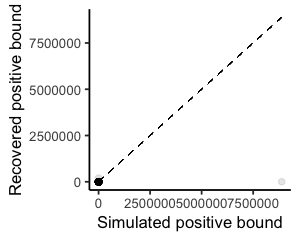

In [453]:
recover_plot(ddm_est, ddm_rec, 2)
pdf("Thresh_recov_pos.pdf", width = 2.5, height = 2)
recover_plot(ddm_est, ddm_rec, 2, 100)
dev.off()

Warning message:
“Removed 9 rows containing missing values (geom_point).”

pdf 
  2

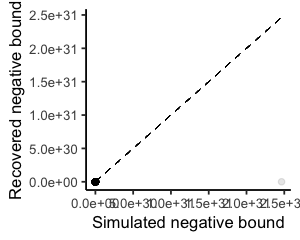

In [452]:
recover_plot(ddm_est, ddm_rec, 3)
pdf("Thresh_recov_neg.pdf", width = 2.5, height = 2)
recover_plot(ddm_est, ddm_rec, 3, 100)
dev.off()

### K-Samples / Count model

In [460]:
cnt_est <- read.csv(paste0(estdir, "estimates_Ksamples_ORA3_13Jan2022.csv"), header=FALSE)
cnt_rec <- read.csv(paste0(recdir, "estimates_generatedKsamples_recoveredKsamples_all.csv"), header=FALSE)
names(cnt_rec) = c("decision noise", "criterion")
names(cnt_est) = names(cnt_rec)

In [459]:
pdf("Count_recov_noise.pdf", width = 2.5, height = 2)
recover_plot(cnt_est, cnt_rec, 1)
dev.off()
#recover_plot(cnt_est, cnt_rec, 1, 0.75)

pdf 
  2

In [461]:
pdf("Count_recov_criterion.pdf", width = 2.5, height = 2)
recover_plot(cnt_est, cnt_rec, 2)
dev.off()

pdf 
  2

### Optimal Model

In [472]:
opt_est <- read.csv(paste0(estdir, "estimates_optimalFull_ORA3_19March2019.csv"), header=FALSE)
opt_rec <- read.csv(paste0(recdir, "estimate_generatedOptimal_recoveredOptimal_all.csv"), header=FALSE)
opt_est$V1 <- NULL # remove subject nr
opt_rec$V1 <- NULL # remove subject nr
names(opt_rec) = c("K", "decision noise", "cost", "risk aversion", "Prior Alpha", "Prior Beta")
names(opt_est) = names(opt_rec)

Warning message:
“Removed 13 rows containing missing values (geom_point).”

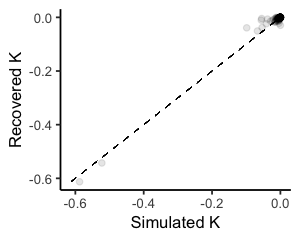

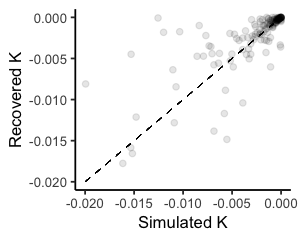

In [463]:
recover_plot(opt_est, opt_rec, 1)
recover_plot(opt_est, opt_rec, 1, 0, -0.02)

Warning message:
“Removed 17 rows containing missing values (geom_point).”

pdf 
  2

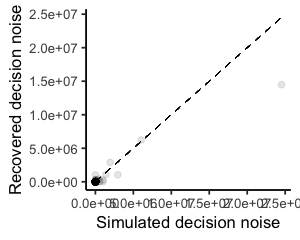

In [468]:
recover_plot(opt_est, opt_rec, 2)
pdf("SampleCost_recov_noise.pdf", width = 2.5, height = 2)
recover_plot(opt_est, opt_rec, 2, 100000)
dev.off()

In [470]:
pdf("SampleCost_recov_cost.pdf", width = 2.5, height = 2)
recover_plot(opt_est, opt_rec, 3)
dev.off()

pdf 
  2

In [473]:
pdf("SampleCost_recov_risk.pdf", width = 2.5, height = 2)
recover_plot(opt_est, opt_rec, 4)
dev.off()

pdf 
  2

In [476]:
opt_est[,"prior belief"] = opt_est[,"Prior Alpha"] / (opt_est[,"Prior Alpha"] + opt_est[,"Prior Beta"])
opt_rec[,"prior belief"] = opt_rec[,"Prior Alpha"] / (opt_rec[,"Prior Alpha"] + opt_rec[,"Prior Beta"])
pdf("SampleCost_recov_Priorbelief.pdf", width = 2.5, height = 2)
recover_plot(opt_est, opt_rec, 7)
dev.off()

pdf 
  2

# Robust regression with model-derived metrics and age

In [499]:
library("MASS")

elo_lin.bisquare <- rlm(elo ~ s_ExactAge, data = df_excl, psi = psi.bisquare)
elo_poly.bisquare <- rlm(elo ~ poly(s_ExactAge, degree = 2, raw = TRUE), data = df_excl, psi = psi.bisquare)
anova(elo_lin.bisquare, elo_poly.bisquare)
summary(elo_poly.bisquare)
tab_model(elo_poly.bisquare, p.style = "scientific", digits.p = 2)

In [501]:
robquad_priormean_model <- rlm(meanprior ~ poly(s_ageExact, degree = 2, raw = FALSE), data = df_models)
robquad_priorSD_model <- rlm(priorSD ~ poly(s_ageExact, degree = 2, raw = FALSE), data = df_models)
robquad_uncert_model <- rlm(criterion ~ poly(s_ageExact, degree = 2, raw = FALSE), data = df_models)
robquad_noise_model <- rlm(softmax ~ poly(s_ageExact, degree = 2, raw = FALSE), data = df_models)

summary(robquad_priormean_model)
tab_model(robquad_priormean_model)
summary(robquad_priorSD_model)
tab_model(robquad_priorSD_model)
summary(robquad_uncert_model)
tab_model(robquad_uncert_model)
summary(robquad_noise_model)
tab_model(robquad_noise_model)


In [511]:
##Anna's code
library("MASS")
df_models$s_age_lin <- scale(poly(df_models$ageExact,2)[, 1])
df_models$s_age_quad <- scale(poly(df_models$ageExact,2)[, 2])

robquad_priormean_model_A <- rlm(meanprior ~ s_age_lin + s_age_quad, data = df_models)
robquad_priorSD_model_A <- rlm(priorSD ~ s_age_lin + s_age_quad, data = df_models)
robquad_uncert_model_A <- rlm(criterion ~ s_age_lin + s_age_quad, data = df_models)
robquad_noise_model_A <- rlm(softmax ~ s_age_lin + s_age_quad, data = df_models)



Call: rlm(formula = meanprior ~ s_age_lin + s_age_quad, data = df_models)
Residuals:
     Min       1Q   Median       3Q      Max 
-0.39939 -0.07734  0.01581  0.05850  0.61512 

Coefficients:
            Value   Std. Error t value
(Intercept)  0.4487  0.0097    46.1880
s_age_lin    0.0210  0.0097     2.1597
s_age_quad  -0.0147  0.0097    -1.5066

Residual standard error: 0.09904 on 154 degrees of freedom

In [514]:

summary(robquad_priormean_model_A)
tab_model(robquad_priormean_model)
summary(robquad_priorSD_model)
tab_model(robquad_priorSD_model)
summary(robquad_uncert_model)
tab_model(robquad_uncert_model)
summary(robquad_noise_model)
tab_model(robquad_noise_model)


Call: rlm(formula = meanprior ~ s_age_lin + s_age_quad, data = df_models)
Residuals:
     Min       1Q   Median       3Q      Max 
-0.39939 -0.07734  0.01581  0.05850  0.61512 

Coefficients:
            Value   Std. Error t value
(Intercept)  0.4487  0.0097    46.1880
s_age_lin    0.0210  0.0097     2.1597
s_age_quad  -0.0147  0.0097    -1.5066

Residual standard error: 0.09904 on 154 degrees of freedom

ERROR: Error in tab_model(robquad_priormean_model): could not find function "tab_model"


In [220]:
pardata<-read.csv('df_models.csv',header=T)

pardata$s_age_lin <- scale(poly(pardata$ageExact,2)[, 1])
pardata$s_age_quad <- scale(poly(pardata$ageExact,2)[, 2])

robquad_priormean_model <- rlm(meanprior ~ s_age_lin + s_age_quad, data = pardata)
robquad_priorSD_model <- rlm(priorSD ~ s_age_lin + s_age_quad, data = pardata)
robquad_uncert_model <- rlm(criterion ~ s_age_lin + s_age_quad, data = pardata)
robquad_noise_model <- rlm(softmax ~ s_age_lin + s_age_quad, data = pardata)


In [221]:

summary(robquad_priormean_model)
tab_model(robquad_priormean_model)
summary(robquad_priorSD_model)
tab_model(robquad_priorSD_model)
summary(robquad_uncert_model)
tab_model(robquad_uncert_model)
summary(robquad_noise_model)
tab_model(robquad_noise_model)



Call: rlm(formula = meanprior ~ s_age_lin + s_age_quad, data = pardata)
Residuals:
     Min       1Q   Median       3Q      Max 
-0.39939 -0.07734  0.01581  0.05850  0.61512 

Coefficients:
            Value   Std. Error t value
(Intercept)  0.4487  0.0097    46.1880
s_age_lin    0.0210  0.0097     2.1597
s_age_quad  -0.0147  0.0097    -1.5066

Residual standard error: 0.09904 on 154 degrees of freedom


Call: rlm(formula = priorSD ~ s_age_lin + s_age_quad, data = pardata)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.207870 -0.048498 -0.001591  0.052069  0.159496 

Coefficients:
            Value   Std. Error t value
(Intercept)  0.1756  0.0063    27.9530
s_age_lin    0.0309  0.0063     4.9068
s_age_quad  -0.0202  0.0063    -3.2068

Residual standard error: 0.0763 on 154 degrees of freedom


Call: rlm(formula = criterion ~ s_age_lin + s_age_quad, data = pardata)
Residuals:
      Min        1Q    Median        3Q       Max 
-0.062229 -0.025964  0.004717  0.019553  0.118249 

Coefficients:
            Value   Std. Error t value
(Intercept)  0.0494  0.0027    18.5802
s_age_lin    0.0140  0.0027     5.2316
s_age_quad  -0.0014  0.0027    -0.5408

Residual standard error: 0.03426 on 154 degrees of freedom


Call: rlm(formula = softmax ~ s_age_lin + s_age_quad, data = pardata)
Residuals:
       Min         1Q     Median         3Q        Max 
-1.442e+02 -7.513e+01 -4.388e+01  3.297e+01  1.450e+07 

Coefficients:
            Value    Std. Error t value 
(Intercept) 126.7322  10.0576    12.6006
s_age_lin    -5.6862  10.0898    -0.5636
s_age_quad   20.8677  10.0898     2.0682

Residual standard error: 150.5 on 154 degrees of freedom